In [3]:
# Install necessary libraries
!pip install rasterio geopandas scikit-learn matplotlib seaborn

In [4]:
# Import necessary libraries
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import geopandas as gpd

# Step 1: Read the multiband tiff image (import in Colab or from your Google Drive folder)

In [5]:
def read_image(file_path):
    image = rasterio.open(file_path)
    return image

def process_image(image):
    image_data = image.read().transpose(1, 2, 0)  # Move bands to the last axis
    rows, cols, bands = image_data.shape
    image_data_reshaped = image_data.reshape(rows * cols, bands)
    return image_data_reshaped, rows, cols

def k_means(image_data_reshaped, rows, cols):
    num_classes = 2  # Number of classes (clusters)
    kmeans = KMeans(n_clusters=num_classes, random_state=42)
    kmeans.fit(image_data_reshaped)
    predicted_classes = kmeans.labels_.reshape(rows, cols)
    return predicted_classes 

def visualization(predicted_classes):
    colors = ['red', 'green'] # One color for each clusters
    class_bins = [0, 1,]
    cmap = ListedColormap(colors)
    
    show(predicted_classes, cmap=cmap)

def save(out ,predicted_classes ):
    output_image_path = out
    with rasterio.open(output_image_path, 'w', **image.meta) as dst:
        dst.write(predicted_classes.astype(rasterio.uint8), 1)

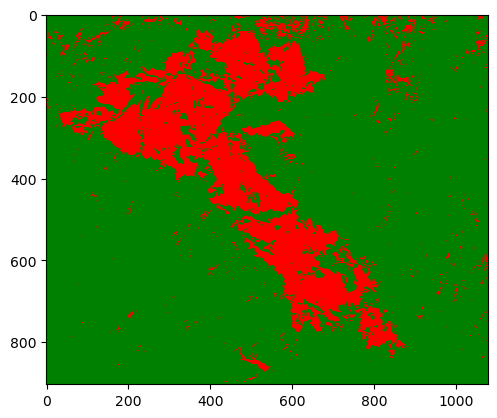

In [6]:
file_path = 'post_fire.tif'
image = read_image(file_path)
image_data_reshaped, rows, cols = process_image(image)
predicted_classes  = k_means(image_data_reshaped, rows, cols)
visualization(predicted_classes)
save('virtual raster postfire_clip_kmeans.tif',predicted_classes)

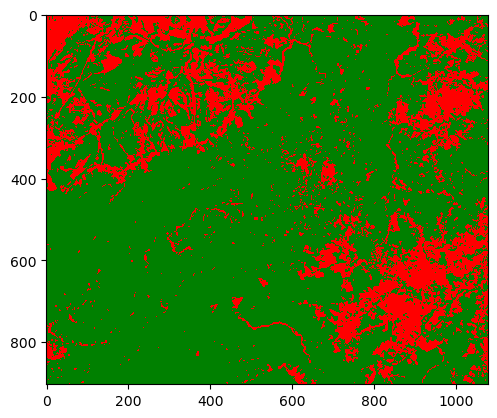

In [7]:
file_path = 'virtual raster prefire_mask.tif'
image = read_image(file_path)
image_data_reshaped, rows, cols = process_image(image)
predicted_classes  = k_means(image_data_reshaped, rows, cols)
visualization(predicted_classes)
save('virtual raster prefire_clip_kmeans.tif',predicted_classes)